/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


predicted=499.202798, expected=423.666667
predicted=391.233186, expected=458.166667
predicted=483.197849, expected=511.000000
predicted=530.660763, expected=487.666667
predicted=485.965723, expected=472.000000
predicted=493.373383, expected=611.166667
predicted=659.503594, expected=539.500000
predicted=456.659235, expected=458.166667
predicted=469.564717, expected=410.166667
predicted=390.831742, expected=364.333333
predicted=321.700942, expected=400.166667
predicted=447.668458, expected=396.333333
predicted=402.273467, expected=304.333333
predicted=286.341515, expected=301.000000
predicted=331.892687, expected=389.166667
predicted=407.831316, expected=471.500000
predicted=492.897997, expected=511.833333
predicted=540.301982, expected=575.000000
predicted=593.966285, expected=572.000000
predicted=528.919798, expected=574.333333
predicted=561.474793, expected=611.500000
predicted=610.443486, expected=605.833333
predicted=578.739904, expected=566.166667
predicted=556.081507, expected=486

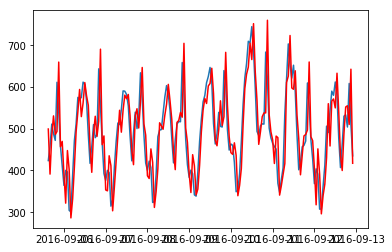

In [1]:
from datetime import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import autocorrelation_plot
from pandas import DataFrame

conso = pd.read_csv('./Data/conso_train.csv', sep=';')
conso.date = pd.to_datetime(conso.date)
conso.index = conso.date

X = conso.puissance
size = int(len(X) * 0.98)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):
	model = ARIMA(history, order=(5,1,0))
	model_fit = model.fit(disp=0)
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)
# conversion de la liste predictions en DataFrame et ajout du même index que Test pour pouvoir les plot sur le même graphe
predictions = pd.DataFrame.from_records(predictions)
predictions.index = test.index
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()